In [1]:
import pandas as pd
%pip install numpy
%pip install seaborn
%pip install matplotlib
%pip install DateTime
%pip install anaconda
%pip install pystan 
%pip install statsforecast
%pip install pyaf
%pip install prophet
%pip install PyPi
%pip install lmfit

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [38]:
import DateTime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsforecast.utils import generate_series
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import prophet as prophet
from prophet import Prophet
from lmfit.models import LorentzianModel
import plotly.express as px
import matplotlib as mpl
from prophet.plot import add_changepoints_to_plot
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [193]:
Y2021 = pd.read_csv('C:/Users/busin/OneDrive/Desktop/HexClad/Incoming Ticket Volume - 2021.csv')
Y2022 = pd.read_csv('C:/Users/busin/OneDrive/Desktop/HexClad/Incoming Ticket Volume - 2022.csv')
ZD = pd.read_csv("C:/Users/busin/OneDrive/Desktop/HexClad/Incoming Ticket Volume - ZD 20-22.csv")
kd0 = pd.read_csv("C:/Users/busin/OneDrive/Desktop/HexClad/Incoming Ticket Volume - 2020D.csv")
kd1 = pd.read_csv("C:/Users/busin/OneDrive/Desktop/HexClad/Incoming Ticket Volume - 2021D.csv")
kd2 = pd.read_csv("C:/Users/busin/OneDrive/Desktop/HexClad/Incoming Ticket Volume - 2022D.csv")

In [194]:
full_kd = pd.concat([kd0, kd1])
full_kd = full_kd.reset_index()
full_kdd = pd.concat([full_kd, kd2])
full_kdd = full_kdd.reset_index()
full_kdd.dtypes

level_0                             int64
index                             float64
DateTime                           object
Inbound Customers                   int64
Inbound Conversations               int64
Adjusted Inbound Conversations    float64
dtype: object

In [195]:
full_kdd

,level_0,index,DateTime,Inbound Customers,Inbound Conversations,Adjusted Inbound Conversations
0,0,0.0,2020-11-01 0:00:00,50,55,NaN
1,1,1.0,2020-11-02 0:00:00,90,159,NaN
2,2,2.0,2020-11-03 0:00:00,96,141,NaN
3,3,3.0,2020-11-04 0:00:00,85,126,NaN
4,4,4.0,2020-11-05 0:00:00,97,149,NaN
...,...,...,...,...,...,...
725,299,NaN,2022-10-27 0:00:00,192,230,230.0
726,300,NaN,2022-10-28 0:00:00,213,217,217.0
727,301,NaN,2022-10-29 0:00:00,135,136,136.0
728,302,NaN,2022-10-30 0:00:00,166,168,168.0


In [196]:
full_kdd['DateTime'] = pd.to_datetime(full_kdd['DateTime'], format='%Y-%m-%d', errors="coerce")
full_kdd = full_kdd.drop(columns={'level_0', 'index'})
full_kdd = full_kdd.rename(columns={'Inbound Customers' : 'Inbound_Customers', 'Inbound Conversations' : 'Inbound_Conversations', 'Adjusted Inbound Conversations' : 'Adjusted_Inbound_Conversations'})
full_kdd

,DateTime,Inbound_Customers,Inbound_Conversations,Adjusted_Inbound_Conversations
0,2020-11-01,50,55,NaN
1,2020-11-02,90,159,NaN
2,2020-11-03,96,141,NaN
3,2020-11-04,85,126,NaN
4,2020-11-05,97,149,NaN
...,...,...,...,...
725,2022-10-27,192,230,230.0
726,2022-10-28,213,217,217.0
727,2022-10-29,135,136,136.0
728,2022-10-30,166,168,168.0


In [197]:
full_kdd =full_kdd.iloc[-730:]
k = full_kdd
k = k.drop(columns={'Inbound_Customers', 'Adjusted_Inbound_Conversations'})
k = k.rename(columns={'DateTime' : 'ds', 'Inbound_Conversations' : 'y'})
k

,ds,y
0,2020-11-01,55
1,2020-11-02,159
2,2020-11-03,141
3,2020-11-04,126
4,2020-11-05,149
...,...,...
725,2022-10-27,230
726,2022-10-28,217
727,2022-10-29,136
728,2022-10-30,168


In [198]:
# Train test split
df_train = k[k['ds']<='2022-10-31']
df_test = k[k['ds']>'2022-10-31']
# Print the number of records and date range for training and testing dataset.
print('The training dataset has', len(df_train), 'records, ranging from', df_train['ds'].min(), 'to', df_train['ds'].max())
print('The testing dataset has', len(df_test), 'records, ranging from', df_test['ds'].min(), 'to', df_test['ds'].max())

The training dataset has 730 records, ranging from 2020-11-01 00:00:00 to 2022-10-31 00:00:00
The testing dataset has 0 records, ranging from NaT to NaT


In [199]:
m = Prophet(changepoint_range=0.95)
m.fit(df_train)
future = m.make_future_dataframe(periods=30, freq='D')
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(30)

2022-11-09 22:03:26 cmdstanpy DEBUG: cmd: where.exe tbb.dll
cwd: None
2022-11-09 22:03:26 cmdstanpy DEBUG: TBB already found in load path
2022-11-09 22:03:26 prophet INFO: Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
2022-11-09 22:03:26 prophet INFO: Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
2022-11-09 22:03:26 cmdstanpy DEBUG: input tempfile: C:\Users\busin\AppData\Local\Temp\tmpfpc5beze\bzzlzo1l.json
2022-11-09 22:03:26 cmdstanpy DEBUG: input tempfile: C:\Users\busin\AppData\Local\Temp\tmpfpc5beze\x05yfihj.json
2022-11-09 22:03:26 cmdstanpy DEBUG: idx 0
2022-11-09 22:03:26 cmdstanpy DEBUG: running CmdStan, num_threads: None
2022-11-09 22:03:26 cmdstanpy DEBUG: CmdStan args: ['C:\\Users\\busin\\anaconda3\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=94183', 'data', 'file=C:\\Users\\busin\\AppData\\Local\\Temp\\tmpfpc5beze\\bzzlzo1l.json', 'init=C:\\Users\\busin\\App

,ds,yhat,yhat_lower,yhat_upper
730,2022-11-01,269.577900,135.759769,406.247302
731,2022-11-02,256.419360,108.260796,392.353567
732,2022-11-03,239.163235,105.164475,384.030221
733,2022-11-04,250.158238,114.196980,387.120602
734,2022-11-05,202.934974,51.443283,346.021006
735,2022-11-06,200.303659,48.163062,334.780611
736,2022-11-07,283.838062,139.019565,409.262692
737,2022-11-08,272.347849,146.502540,412.271696
738,2022-11-09,259.189310,106.903009,398.049039
739,2022-11-10,241.933184,102.519592,382.248984


In [207]:
fig = px.scatter(forecast.reset_index(), x='ds', y='yhat', color='yhat_upper', title='Conversational Demand')
#slider
fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
              dict(count=1, label='1M', step="month", stepmode="backward"),
              dict(count=3, label='3M', step="month", stepmode="backward"),
              dict(count=6, label='6M', step="month", stepmode="backward"),
              dict(label = 'All' , step="all")
        ])
    )
)
fig.show()

In [200]:
# Create the prophet model with confidence internal of 95%
m = Prophet(interval_width=0.95)
# Fit the model using the training dataset
m.fit(df_train)

2022-11-09 22:03:30 cmdstanpy DEBUG: cmd: where.exe tbb.dll
cwd: None
2022-11-09 22:03:30 cmdstanpy DEBUG: TBB already found in load path
2022-11-09 22:03:30 prophet INFO: Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
2022-11-09 22:03:30 prophet INFO: Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
2022-11-09 22:03:30 cmdstanpy DEBUG: input tempfile: C:\Users\busin\AppData\Local\Temp\tmpfpc5beze\f_af7iym.json
2022-11-09 22:03:30 cmdstanpy DEBUG: input tempfile: C:\Users\busin\AppData\Local\Temp\tmpfpc5beze\rstecvwm.json
2022-11-09 22:03:30 cmdstanpy DEBUG: idx 0
2022-11-09 22:03:30 cmdstanpy DEBUG: running CmdStan, num_threads: None
2022-11-09 22:03:30 cmdstanpy DEBUG: CmdStan args: ['C:\\Users\\busin\\anaconda3\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=24104', 'data', 'file=C:\\Users\\busin\\AppData\\Local\\Temp\\tmpfpc5beze\\f_af7iym.json', 'init=C:\\Users\\busin\\App

In [201]:
# Create a future dataframe for prediction
future = m.make_future_dataframe(periods=61)
# Forecast the future dataframe values
forecast = m.predict(future)
# Check the forecasted values and upper/lower bound
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

,ds,yhat,yhat_lower,yhat_upper
761,2022-12-02,263.002751,54.383296,482.504813
762,2022-12-03,215.900200,8.841471,439.124079
763,2022-12-04,213.384033,-4.295542,429.756269
764,2022-12-05,296.592776,106.327171,502.490190
765,2022-12-06,285.212103,78.689237,499.072685
766,2022-12-07,272.088293,66.728543,476.044446
767,2022-12-08,254.876771,52.022577,467.088196
768,2022-12-09,265.858409,58.871052,478.890795
769,2022-12-10,218.755859,5.021763,432.382506
770,2022-12-11,216.239691,0.747063,441.173629


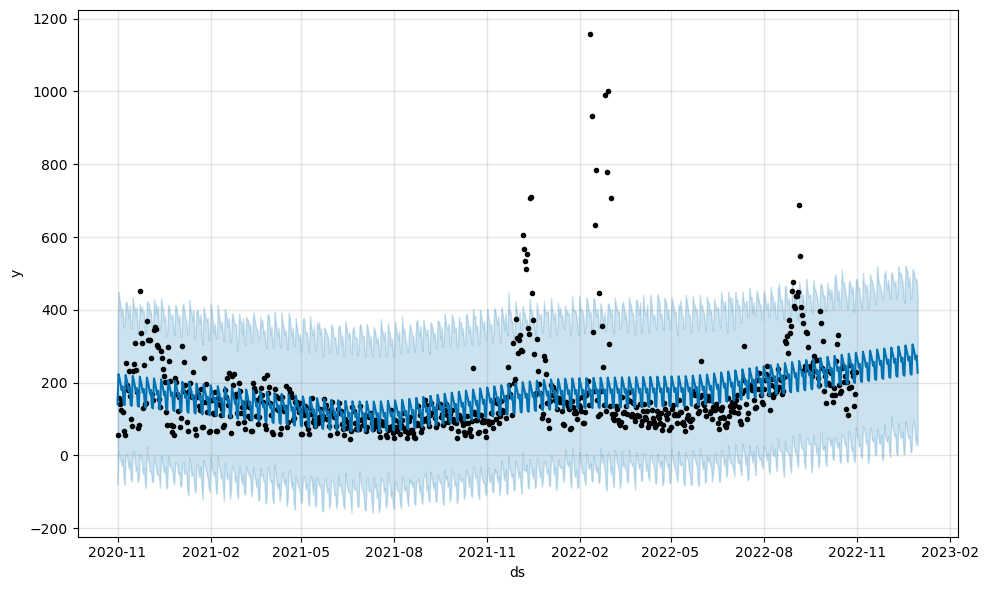

In [202]:
fig = m.plot(forecast)
ax = fig.gca()
ax.plot( df_test["ds"], df_test["y"], 'r.')


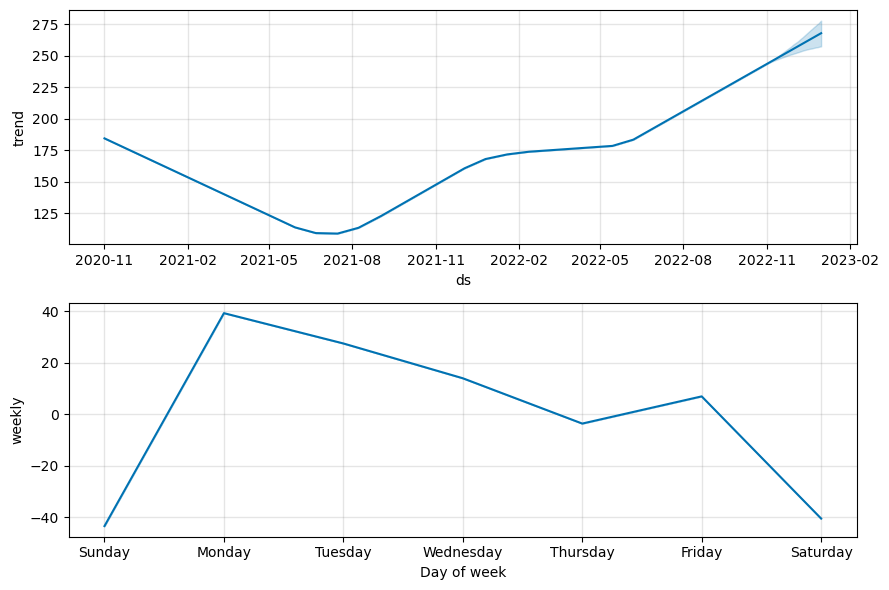

In [203]:
# Visualize the components
m.plot_components(forecast);

In [204]:
# Default change points
print(f'There are {len(m.changepoints)} change points. The change points dates are {k.loc[k["ds"].isin(m.changepoints)]}')

There are 25 change points. The change points dates are             ds    y
23  2020-11-24  337
47  2020-12-18  203
70  2021-01-10   66
93  2021-02-02  152
117 2021-02-26  169
140 2021-03-21  107
163 2021-04-13  132
187 2021-05-07   85
210 2021-05-30   57
233 2021-06-22  122
257 2021-07-16   78
280 2021-08-08   85
303 2021-08-31   99
326 2021-09-23   93
350 2021-10-17   95
373 2021-11-09  152
396 2021-12-02  316
420 2021-12-26  113
443 2022-01-18  148
466 2022-02-10  139
490 2022-03-06   97
513 2022-03-29  110
536 2022-04-21   88
560 2022-05-15   66
583 2022-06-07  163


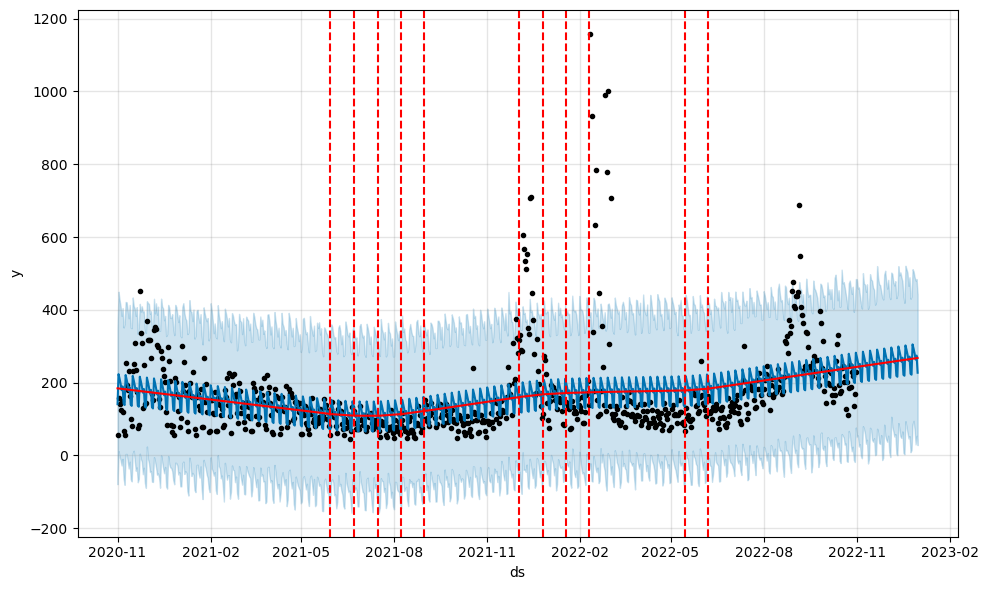

In [205]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [206]:
df_cv = cross_validation(m, initial='500 days', period='60 days', horizon = '30 days', parallel="processes")
df_cv.tail()

2022-11-09 22:03:48 prophet INFO: Making 4 forecasts with cutoffs between 2022-04-04 00:00:00 and 2022-10-01 00:00:00
2022-11-09 22:03:48 prophet INFO: Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002B83FBEF6A0>


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
115,2022-10-27,276.459291,65.836509,491.775719,230,2022-10-01
116,2022-10-28,291.166102,77.606061,498.680793,217,2022-10-01
117,2022-10-29,242.846640,16.162142,449.356062,136,2022-10-01
118,2022-10-30,241.344698,30.716567,452.512551,168,2022-10-01
119,2022-10-31,326.684622,118.706338,523.853397,228,2022-10-01


In [37]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,25975.184184,161.168186,120.342824,0.478076,0.583403,0.544607,0.666667
1,4 days,30437.652892,174.463901,124.409067,0.447357,0.447350,0.528389,0.666667
2,5 days,48034.707908,219.168218,145.880335,0.434309,0.447350,0.539269,0.666667
3,6 days,50835.128080,225.466468,148.499629,0.394869,0.376742,0.503172,0.666667
4,7 days,45164.763603,212.520031,139.784232,0.402000,0.376742,0.483274,0.666667


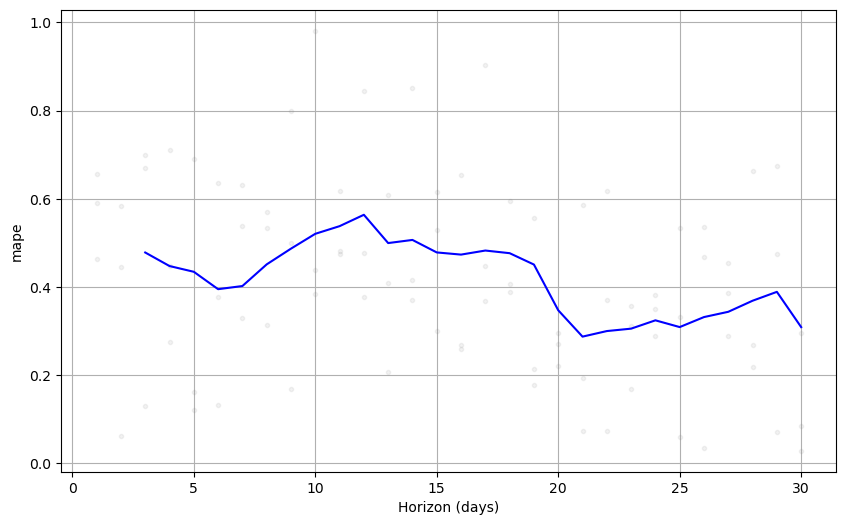

In [39]:
# Visualize the performance metrics
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [89]:
YY_forecast_train = k[:-120]
YY_forecast_test = k[-120:]
horizon = len(YY_forecast_test)
import pyaf.ForecastEngine as autof

#set up model engine
lEngine = autof.cForecastEngine()

#get best time series model for test prediction
lEngine.train(iInputDS=YY_forecast_train, iTime = 'ds', iSignal = 'y', iHorizon = horizon)
#forecast_ic = lEngine.forecast(Y_forecast_train, horizon)
forecast_zd = lEngine.forecast(YY_forecast_train, horizon)
forecast_zd.tail()


,ds,y,row_number,ds_Normalized,_y,_y_Lag1Trend,_y_Lag1Trend_residue,_y_Lag1Trend_residue_Seasonal_DayOfNthWeekOfMonth,_y_Lag1Trend_residue_Seasonal_DayOfNthWeekOfMonth_residue,_y_Lag1Trend_residue_Seasonal_DayOfNthWeekOfMonth_residue_NoAR,...,y_Forecast_Quantile_50,y_Forecast_Quantile_55,y_Forecast_Quantile_60,y_Forecast_Quantile_65,y_Forecast_Quantile_70,y_Forecast_Quantile_75,y_Forecast_Quantile_80,y_Forecast_Quantile_85,y_Forecast_Quantile_90,y_Forecast_Quantile_95
725,2022-10-27,NaN,725,1.190476,NaN,0.112860,NaN,-0.011691,NaN,0.0,...,131.75,146.450,156.2,167.925,177.00,184.000,197.6,210.500,235.55,308.925
726,2022-10-28,NaN,726,1.192118,NaN,0.101169,NaN,0.015288,NaN,0.0,...,150.00,165.000,172.7,184.350,193.65,203.000,212.0,228.150,254.05,317.000
727,2022-10-29,NaN,727,1.193760,NaN,0.116457,NaN,-0.037770,NaN,0.0,...,107.50,120.475,130.7,140.000,150.50,161.375,173.0,189.825,213.10,270.925
728,2022-10-30,NaN,728,1.195402,NaN,0.078687,NaN,0.000899,NaN,0.0,...,109.25,118.450,128.9,143.500,153.15,162.875,173.0,190.000,211.50,267.700
729,2022-10-31,NaN,729,1.197044,NaN,0.079586,NaN,0.048561,NaN,0.0,...,164.00,175.475,185.7,196.500,206.15,215.000,228.6,240.650,265.75,333.000


<AxesSubplot:xlabel='ds'>

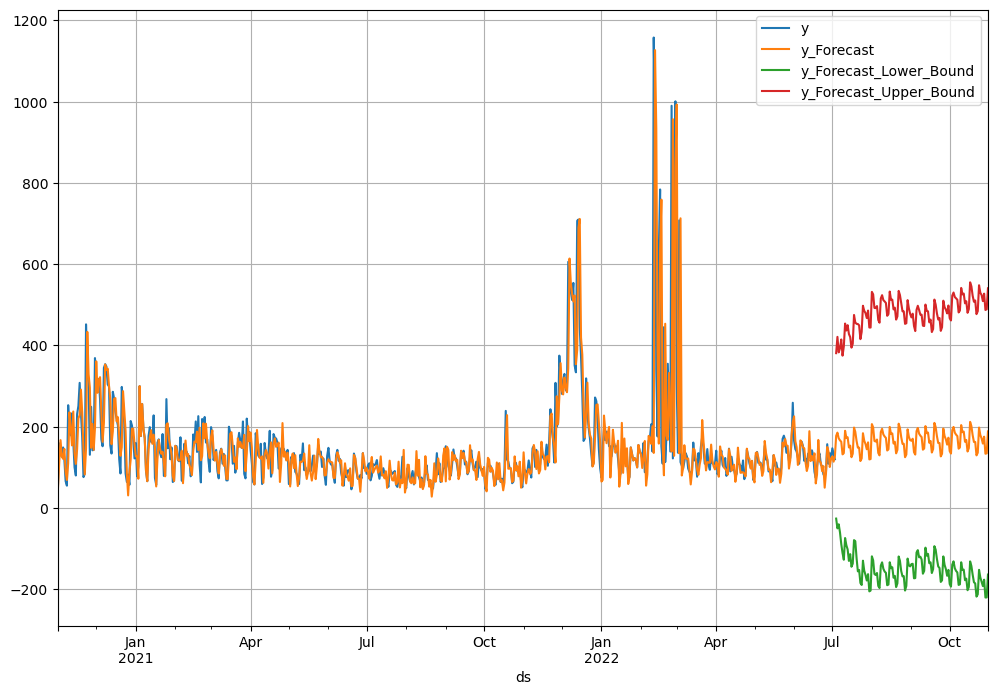

In [90]:
forecast_zd.plot.line('ds', ['y', 'y_Forecast', 'y_Forecast_Lower_Bound','y_Forecast_Upper_Bound'], grid = True, figsize=(12,8))

In [94]:
m = Prophet(interval_width=0.95)
model = m.fit(forecast_zd)

2022-11-09 20:47:51 cmdstanpy DEBUG: cmd: where.exe tbb.dll
cwd: None
2022-11-09 20:47:51 cmdstanpy DEBUG: TBB already found in load path
2022-11-09 20:47:51 prophet INFO: Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
2022-11-09 20:47:51 prophet INFO: Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
2022-11-09 20:47:51 cmdstanpy DEBUG: input tempfile: C:\Users\busin\AppData\Local\Temp\tmpfpc5beze\dlbd67it.json
2022-11-09 20:47:51 cmdstanpy DEBUG: input tempfile: C:\Users\busin\AppData\Local\Temp\tmpfpc5beze\rizghsl2.json
2022-11-09 20:47:51 cmdstanpy DEBUG: idx 0
2022-11-09 20:47:51 cmdstanpy DEBUG: running CmdStan, num_threads: None
2022-11-09 20:47:51 cmdstanpy DEBUG: CmdStan args: ['C:\\Users\\busin\\anaconda3\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=14900', 'data', 'file=C:\\Users\\busin\\AppData\\Local\\Temp\\tmpfpc5beze\\dlbd67it.json', 'init=C:\\Users\\busin\\App

In [95]:
future = m.make_future_dataframe(periods=60, freq = 'D')
forecast = m.predict(future)
forecast.tail(61)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
729,2022-10-31,22.084661,-144.762483,278.861427,-24.325430,64.954215,40.187529,40.187529,40.187529,40.187529,40.187529,40.187529,0.0,0.0,0.0,62.272190
730,2022-11-01,21.386529,-172.828962,256.783469,-25.526397,64.771548,25.494633,25.494633,25.494633,25.494633,25.494633,25.494633,0.0,0.0,0.0,46.881162
731,2022-11-02,20.688397,-174.934632,245.618239,-26.727170,64.588882,13.278053,13.278053,13.278053,13.278053,13.278053,13.278053,0.0,0.0,0.0,33.966450
732,2022-11-03,19.990266,-198.177849,232.522315,-27.923453,64.406216,-6.761065,-6.761065,-6.761065,-6.761065,-6.761065,-6.761065,0.0,0.0,0.0,13.229200
733,2022-11-04,19.292134,-173.302435,263.998939,-28.892769,64.217372,11.477484,11.477484,11.477484,11.477484,11.477484,11.477484,0.0,0.0,0.0,30.769618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,2022-12-26,-17.010726,-203.875025,220.147911,-92.772518,56.551344,40.187529,40.187529,40.187529,40.187529,40.187529,40.187529,0.0,0.0,0.0,23.176803
786,2022-12-27,-17.708858,-226.219670,225.840941,-94.566880,56.416917,25.494633,25.494633,25.494633,25.494633,25.494633,25.494633,0.0,0.0,0.0,7.785775
787,2022-12-28,-18.406990,-217.254668,205.472953,-95.945841,56.281927,13.278053,13.278053,13.278053,13.278053,13.278053,13.278053,0.0,0.0,0.0,-5.128937
788,2022-12-29,-19.105122,-249.658070,197.329331,-97.226417,56.146936,-6.761065,-6.761065,-6.761065,-6.761065,-6.761065,-6.761065,0.0,0.0,0.0,-25.866187


In [93]:
forecast = forecast[['ds', 'yhat']]
forecast.tail(61)

,ds,yhat
729,2022-10-31,62.272190
730,2022-11-01,46.881162
731,2022-11-02,33.966450
732,2022-11-03,13.229200
733,2022-11-04,30.769618
...,...,...
785,2022-12-26,23.176803
786,2022-12-27,7.785775
787,2022-12-28,-5.128937
788,2022-12-29,-25.866187


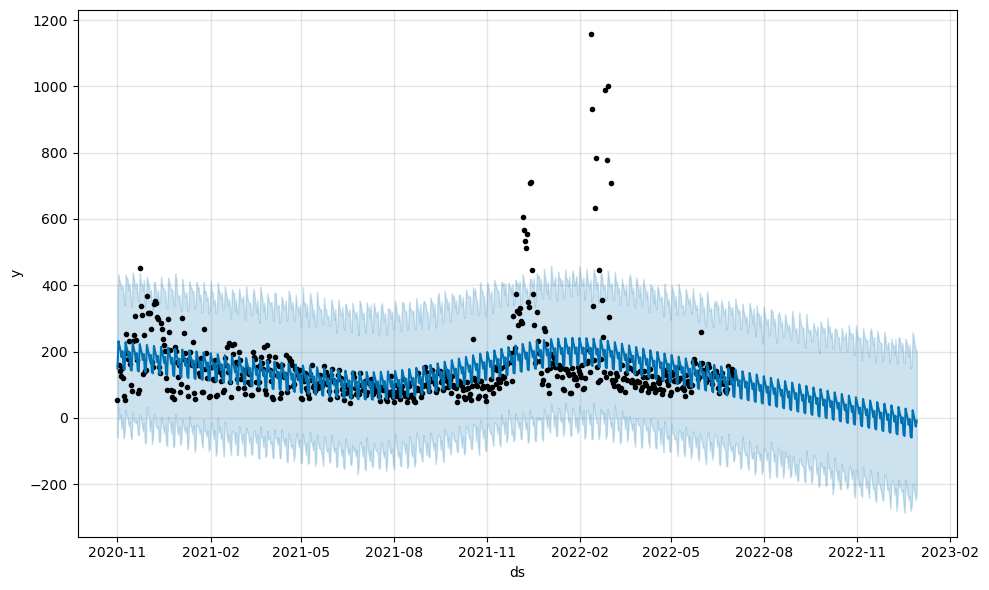

In [81]:
plot = m.plot(forecast)